# ***Business Case: LoanTap Logistic Regression***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_palette('pastel')
sns.set_style('whitegrid')

In [3]:
data = pd.read_csv('LoanTapData.csv')
df = data.copy(deep=True)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# ***1. Problem Statement and EDA***

## ***1.1 Problem Statement***

* Given a set of attributes for an Individual, determine if a credit line should be extended to them.
* If so, what should the repayment terms be in business recommendations?

# 1.2 Observations on 
    
    - shape,
    -  data type,
    -  conversion of categorical attributes to category
    - Missing value detection
    - statistical summary

In [4]:
df.shape

(396030, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [7]:
# Missing Values
missing_df = {'column': df.columns, 'missing_percentage': [round((df[col].isna().sum()/df.shape[0])*100, 2) for col in df.columns]}
missing_df = pd.DataFrame(missing_df)
missing_df = missing_df[missing_df['missing_percentage']>0]
missing_df

,column,missing_percentage
6,emp_title,5.79
7,emp_length,4.62
14,title,0.44
20,revol_util,0.07
24,mort_acc,9.54
25,pub_rec_bankruptcies,0.14


**Comments:**

1. We have missing values in 6 columns

In [8]:
for col in df.columns:
    print(col, ": ", df[col].nunique())

loan_amnt :  1397
term :  2
int_rate :  566
installment :  55706
grade :  7
sub_grade :  35
emp_title :  173105
emp_length :  11
home_ownership :  6
annual_inc :  27197
verification_status :  3
issue_d :  115
loan_status :  2
purpose :  14
title :  48817
dti :  4262
earliest_cr_line :  684
open_acc :  61
pub_rec :  20
revol_bal :  55622
revol_util :  1226
total_acc :  118
initial_list_status :  2
application_type :  3
mort_acc :  33
pub_rec_bankruptcies :  9
address :  393700


## 1.3 Univariate Analysis

In [9]:
num_cols = df.columns[df.dtypes=='float64']
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [10]:
cat_cols = df.columns[df.dtypes=='object']
cat_cols

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

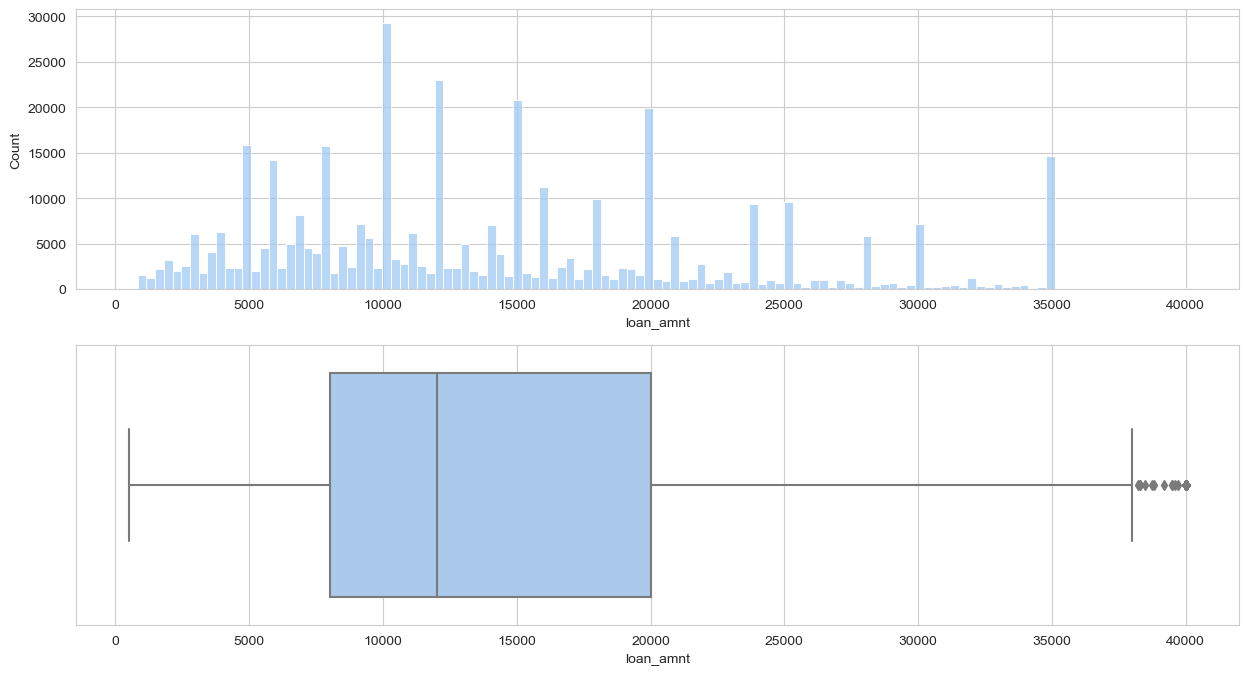

In [11]:
plt.figure(figsize=(15,8))
plt.subplot(2, 1, 1)
sns.histplot(data=df, x='loan_amnt')
plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='loan_amnt')
plt.show()

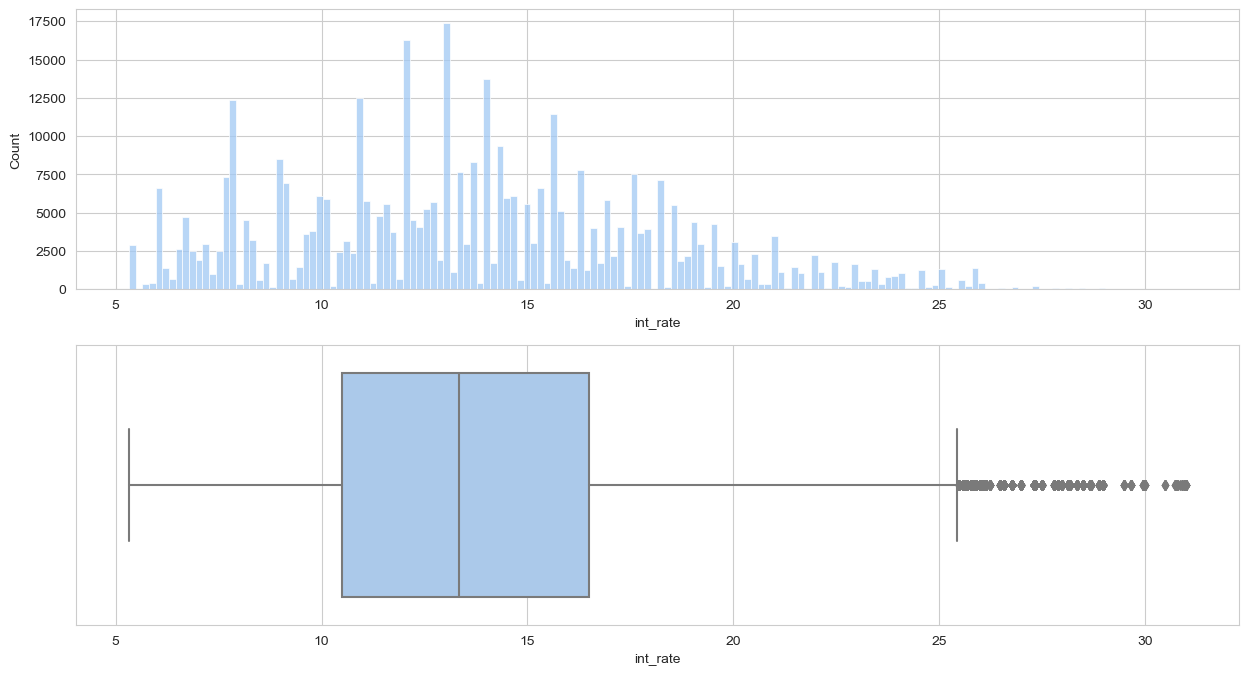

In [12]:
plt.figure(figsize=(15,8))
plt.subplot(2, 1, 1)
sns.histplot(data=df, x='int_rate')
plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='int_rate')
plt.show()

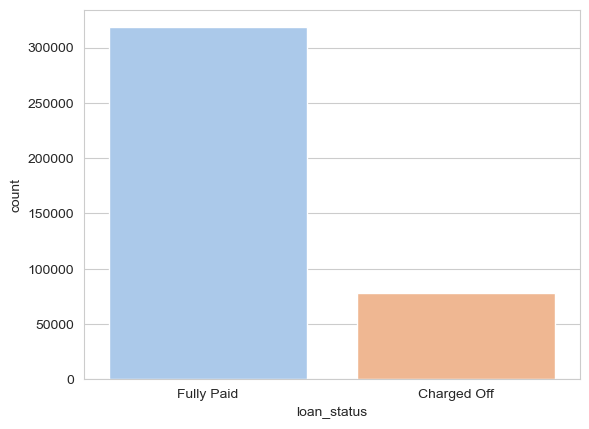

In [13]:
sns.countplot(data = df, x='loan_status')
plt.show()

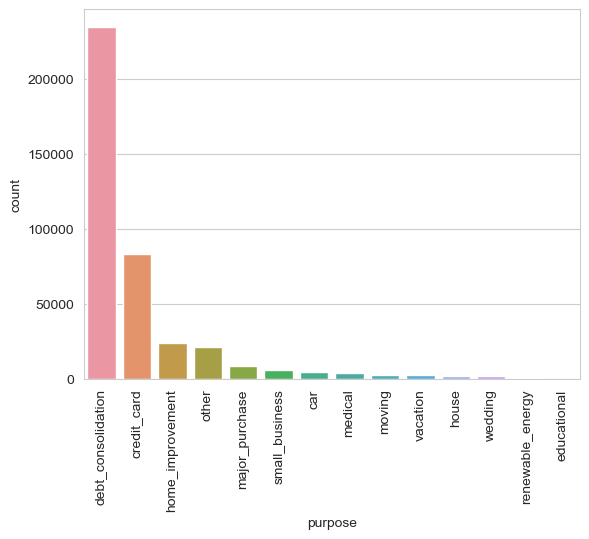

In [14]:
# plt.figure(figsize=(15,8))
sns.countplot(data=df, x='purpose', order=df['purpose'].value_counts().index)
plt.xticks(rotation=90);

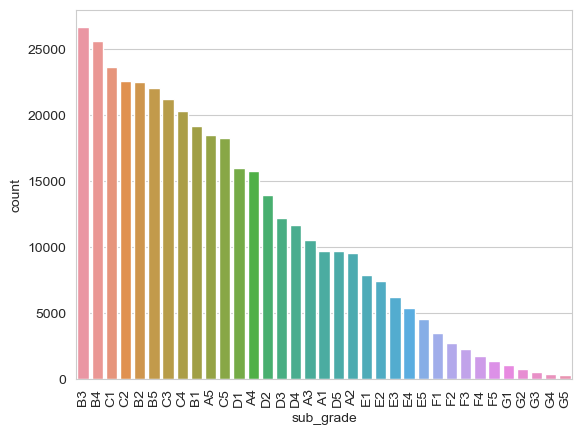

In [15]:
sns.countplot(data=df, x='sub_grade', order=df['sub_grade'].value_counts().index)
plt.xticks(rotation=90);

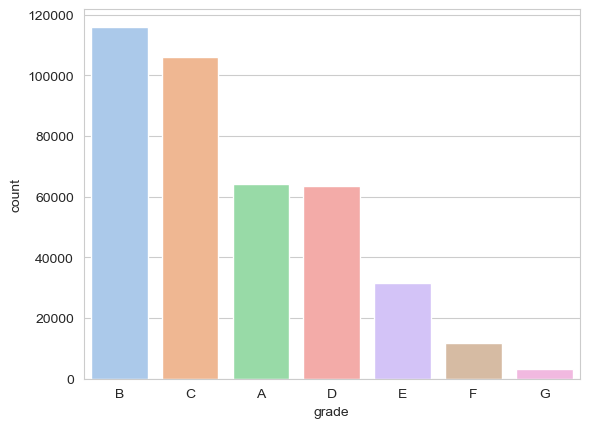

In [16]:
sns.countplot(data=df, x='grade', order=df['grade'].value_counts().index);

In [17]:
df['emp_title'].value_counts().head(10)

Teacher             4389
Manager             4250
Registered Nurse    1856
RN                  1846
Supervisor          1830
Sales               1638
Project Manager     1505
Owner               1410
Driver              1339
Office Manager      1218
Name: emp_title, dtype: int64

## 1.4 Multivariate Analysis

C:\Users\Ayush\AppData\Local\Temp\ipykernel_21832\160050726.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot=True);


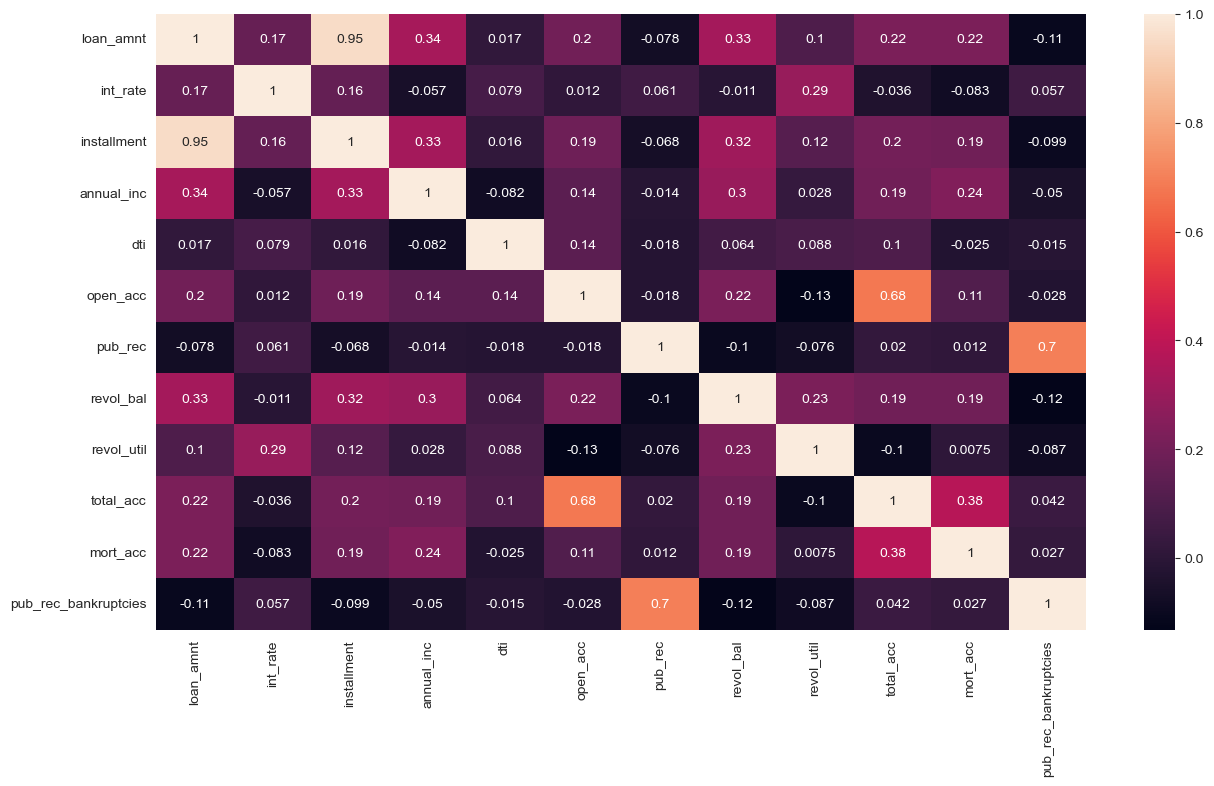

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr() , annot=True);

In [19]:
# sns.pairplot(df)

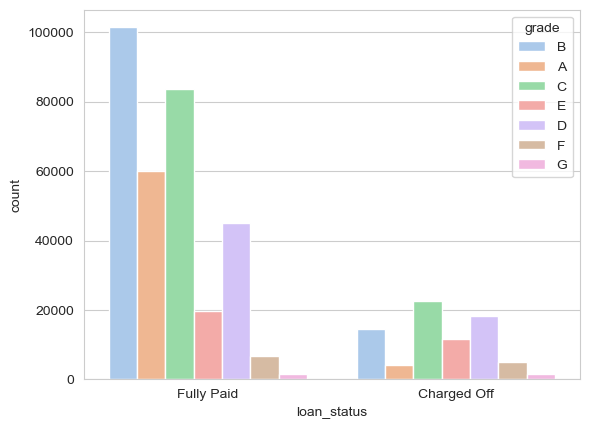

In [20]:
sns.countplot(data=df, x='loan_status', hue='grade');

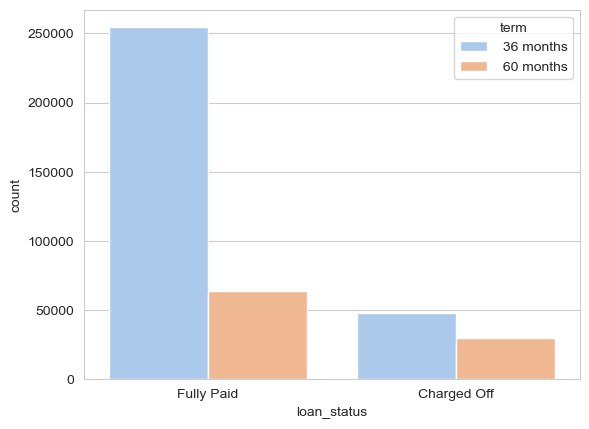

In [21]:
sns.countplot(data=df, x='loan_status', hue='term');

*`Observations from EDA`:*

- We have missing values in 6 columns
- Loan Amount count is around 396030 and wrt to interest rate of Loan amt all data points are seems to be intact.
- The maximum loan amt seems to be 40k and similarly the interest rate for that is near to 30.99%.
- The installment for all this loans are seems to be economic, as the max amount of installment is 1533.
- The annual income and loan amt is seemingly not getting any correlated, but it will be get cleared on correlation data.
- DTI(Debt to INcome ratio) according to above the observation, the ratio should be smaller, but in data it is seemingly opposite.
- Other columns related to Accounts are seemingly dependent on each others.
- As we can see 76% people have opted for 36 months tenure, as they want finish the loan as soon as possible.
- As we can clearly see from Heatmap, as there is high Correlation between these Features. And other than this, Total Account vs Open Account, Pub_rec vs Pub_rec_bankrupties also have a good correlation.
- We can see from Count Plot most of the datapoints are pointing towards 10+ exp length, so from these we can guesstimate the age of customers to be near to 35+ years.

## 1.5 Insights based on EDA

# ***2. Data Preprocessing***

## 2.1 Duplicate Value Check

In [22]:
df.duplicated().sum()

0

No duplicated values

## 2.2 Missing value Treatment

In [23]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [24]:
missing_df

,column,missing_percentage
6,emp_title,5.79
7,emp_length,4.62
14,title,0.44
20,revol_util,0.07
24,mort_acc,9.54
25,pub_rec_bankruptcies,0.14


In [25]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

Let's handle missing values of 'mort_acc' first

In [26]:
df.groupby(by='total_acc').mean()

C:\Users\Ayush\AppData\Local\Temp\ipykernel_21832\692112835.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='total_acc').mean()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies
total_acc,,,,,,,,,,,
2.0,6672.222222,15.801111,210.881667,64277.777778,2.279444,1.611111,0.000000,2860.166667,53.527778,0.000000,0.000000
3.0,6042.966361,15.615566,198.728318,41270.753884,6.502813,2.611621,0.045872,3382.807339,49.991022,0.052023,0.015480
4.0,7587.399031,15.069491,250.050194,42426.565969,8.411963,3.324717,0.041195,4874.231826,58.477400,0.066743,0.022951
5.0,7845.734714,14.917564,256.190325,44394.098003,10.118328,3.921598,0.071499,5475.253452,56.890311,0.103289,0.041171
6.0,8529.019843,14.651752,278.518228,48470.001156,11.222542,4.511119,0.104003,6546.374957,57.812483,0.151293,0.055077
...,...,...,...,...,...,...,...,...,...,...,...
124.0,23200.000000,17.860000,587.370000,66000.000000,14.040000,43.000000,0.000000,25497.000000,75.400000,1.000000,0.000000
129.0,25000.000000,7.890000,505.600000,200000.000000,8.900000,48.000000,0.000000,27659.000000,8.300000,1.000000,0.000000
135.0,24000.000000,15.410000,576.140000,82000.000000,33.850000,57.000000,0.000000,35715.000000,50.800000,3.000000,0.000000


In [27]:
total_acc_avg=df.groupby(by='total_acc').mean().mort_acc
# saving mean of mort_acc according to total_acc_avg

C:\Users\Ayush\AppData\Local\Temp\ipykernel_21832\82603880.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_acc_avg=df.groupby(by='total_acc').mean().mort_acc


In [28]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [29]:
df['mort_acc']=df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [30]:
df.isnull().sum()/len(data)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [31]:
# Current no. of rows
df.shape

(396030, 27)

In [32]:
# Dropping rows with null values
df.dropna(inplace=True)

In [33]:
# Remaining no. of rows
data.shape

(396030, 27)

## 2.3 Outlier Treatment

In [34]:
len(num_cols)

12

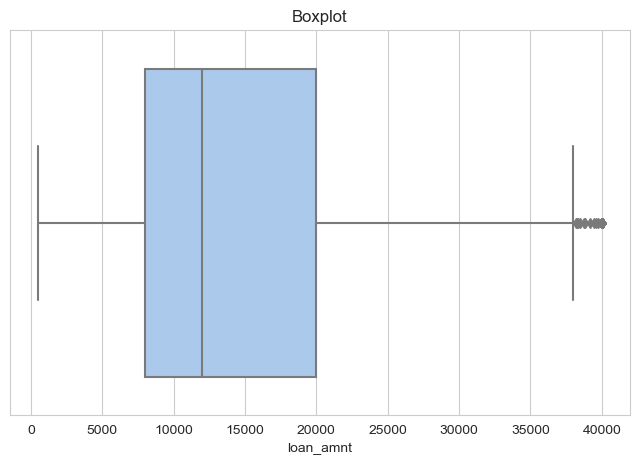

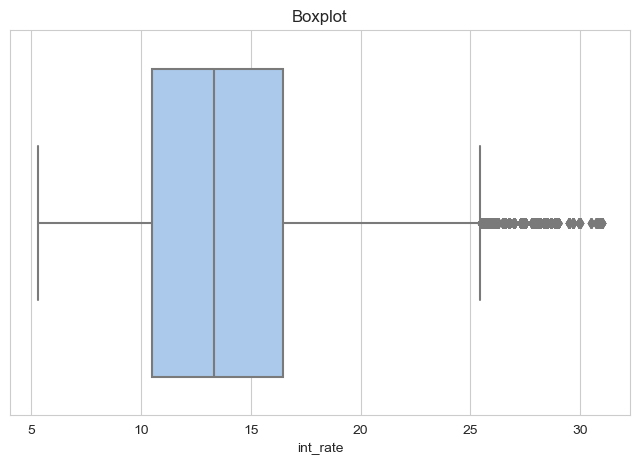

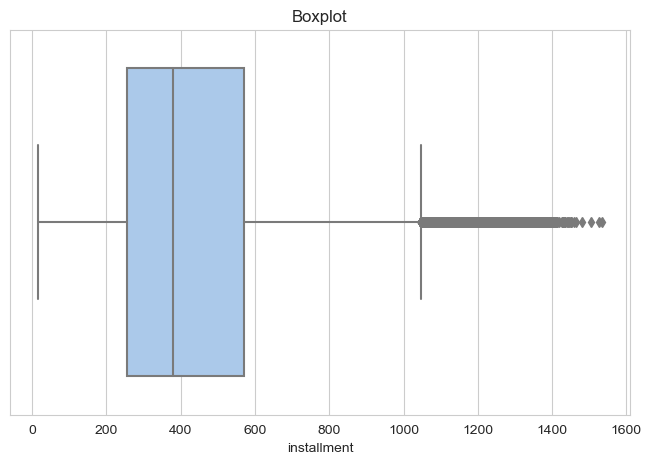

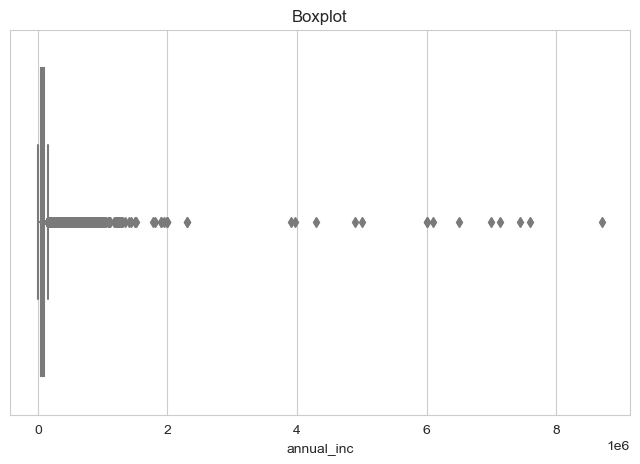

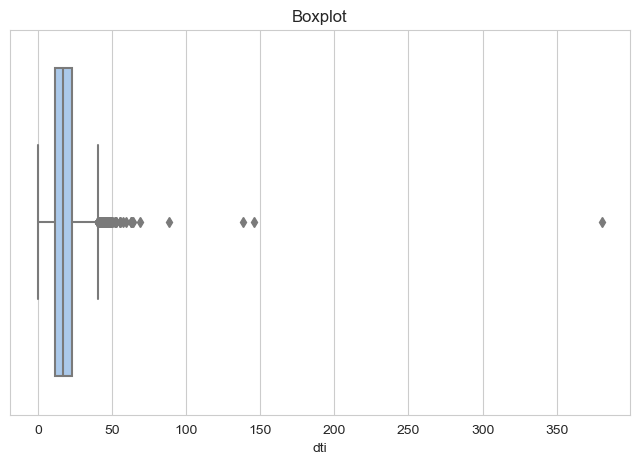

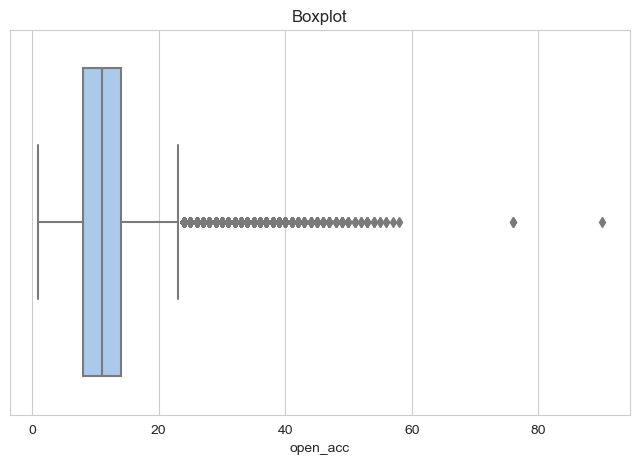

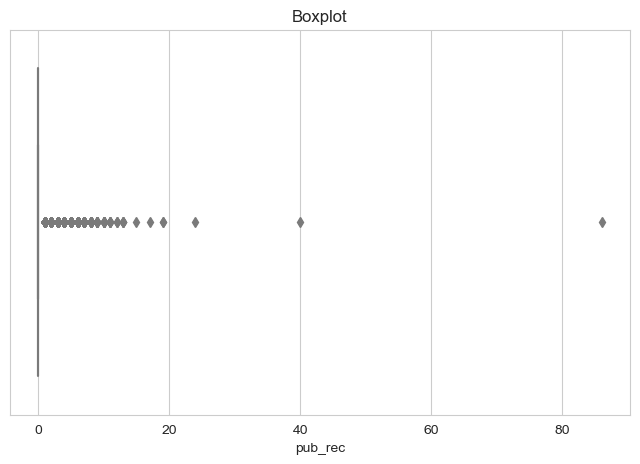

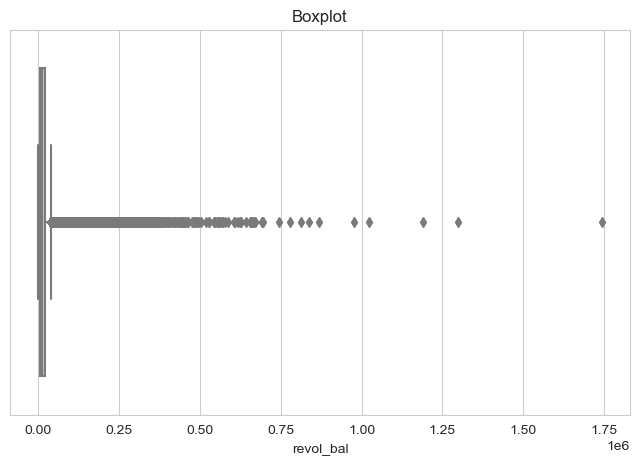

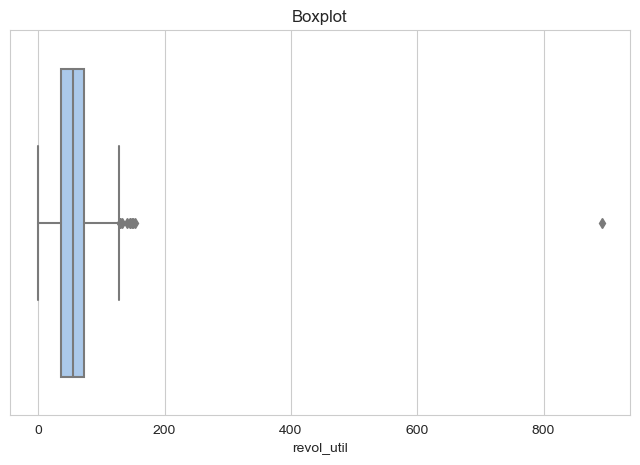

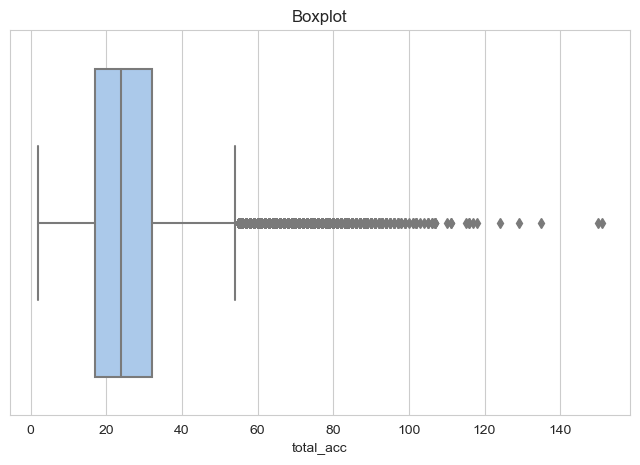

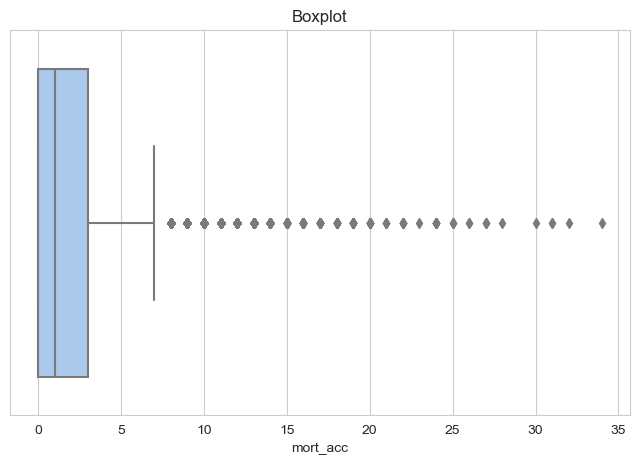

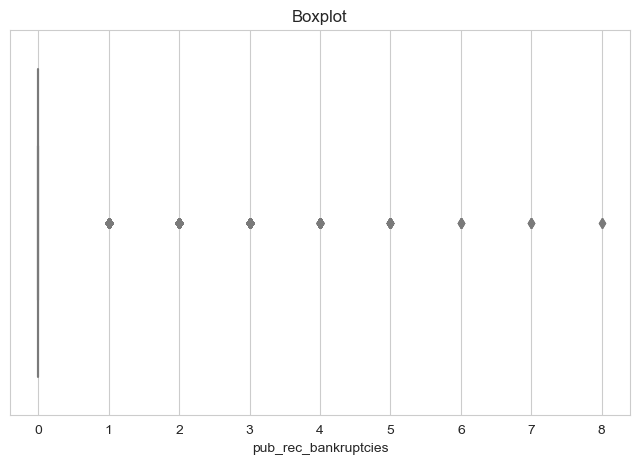

In [35]:
def box_plot(col):
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col])
    plt.title('Boxplot')
    plt.show()
    
for col in num_cols:
    box_plot(col)

In [36]:
for col in num_cols:
    mean=df[col].mean()
    std=df[col].std()
    
    upper_limit=mean+3*std
    lower_limit=mean-3*std
    
    df=df[(df[col]<upper_limit) & (df[col]>lower_limit)]
    
df.shape

(338364, 27)

## **2.4 Data Preprocessing and Feature Engineering**

In [37]:
# Mapping of target variable 
df['loan_status'] = df.loan_status.map({'Fully Paid':0, 'Charged Off':1})

In [38]:
df["sub_grade"]=df["sub_grade"].str.extract("(\d+)")

In [39]:
df[["grade","sub_grade"]].head()

,grade,sub_grade
0,B,4
1,B,5
2,B,3
3,A,2
4,C,5


In [40]:
#below are high outlier columns. We dont want to delete these records since someone whos taken a loan for the first time may have low bankruptucy record
#so im just flagging anything more than 0 as 1

def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [41]:
data['pub_rec']=data.pub_rec.apply(pub_rec)
data['mort_acc']=data.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies']=data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)


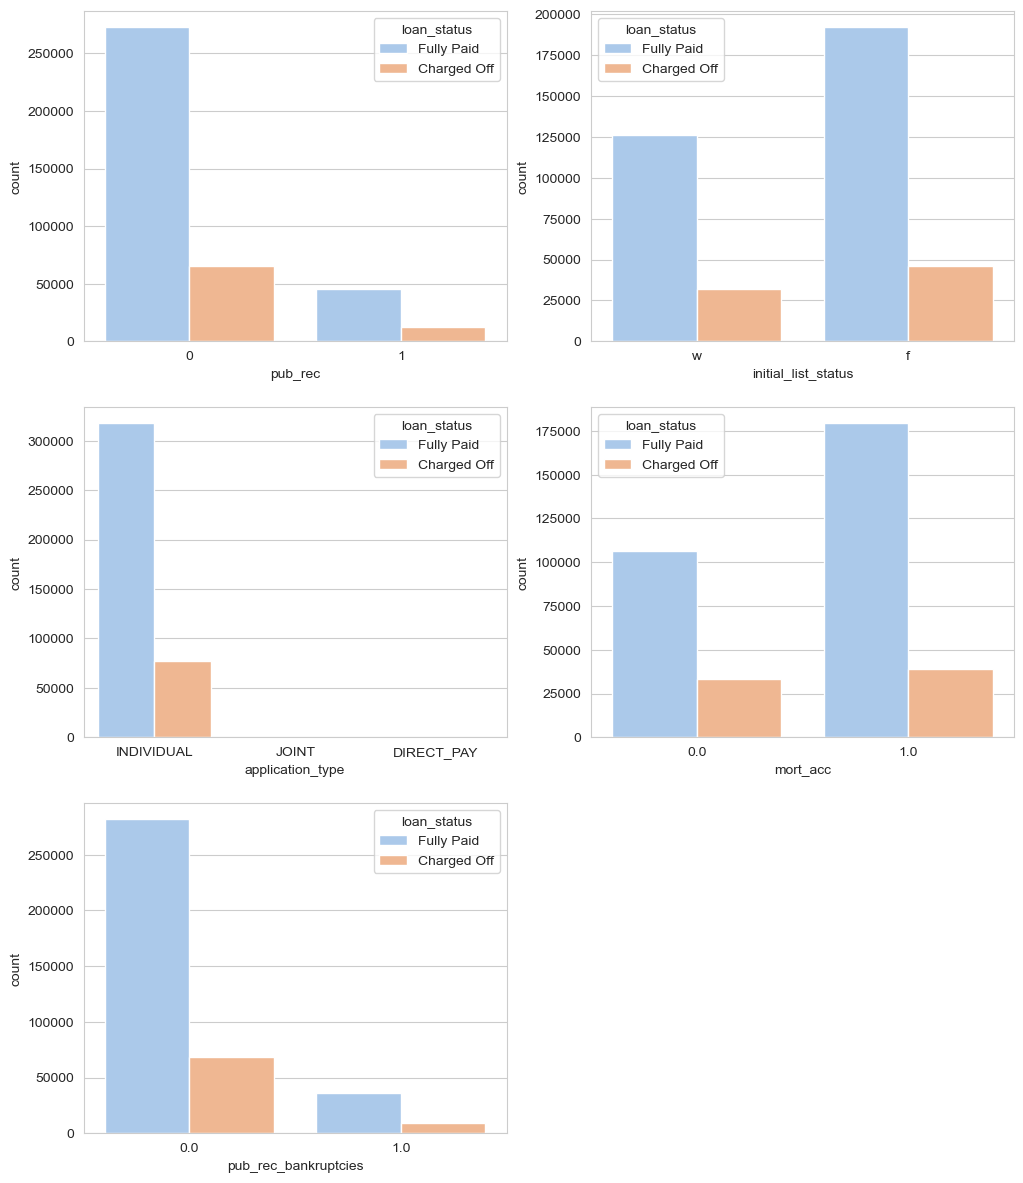

In [42]:
plt.figure(figsize=(12,30))

plt.subplot(6,2,1)
sns.countplot(x='pub_rec',data=data,hue='loan_status')

plt.subplot(6,2,2)
sns.countplot(x='initial_list_status',data=data,hue='loan_status')

plt.subplot(6,2,3)
sns.countplot(x='application_type',data=data,hue='loan_status')

plt.subplot(6,2,4)
sns.countplot(x='mort_acc',data=data,hue='loan_status')

plt.subplot(6,2,5)
sns.countplot(x='pub_rec_bankruptcies',data=data,hue='loan_status');

In [43]:
# Term
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [44]:
term_values={' 36 months': 36, ' 60 months':60}
df['term'] = df.term.map(term_values)

In [45]:
# Initial List Status
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [46]:
list_status = {'w': 0, 'f': 1}
df['initial_list_status'] = df.initial_list_status.map(list_status)

In [47]:
# Let's fetch ZIP from address and then drop the remaining details -
df['zip_code'] = df.address.apply(lambda x: x[-5:])

In [48]:
df['zip_code'].value_counts(normalize=True)*100

70466    14.365299
30723    14.290823
22690    14.254767
48052    14.142462
00813    11.603480
29597    11.532551
05113    11.525458
93700     2.772163
11650     2.769207
86630     2.743791
Name: zip_code, dtype: float64

In [49]:
# Dropping some variables which we can let go for now 
df.drop(columns=['issue_d', 'emp_title', 'title', 'sub_grade',
                   'address', 'earliest_cr_line', 'emp_length'], 
                   axis=1, inplace=True)

**One Hot Encoding**

In [50]:
dummies=['purpose', 'zip_code', 'grade', 'verification_status', 'application_type', 'home_ownership']
df=pd.get_dummies(df,columns=dummies,drop_first=True)

In [51]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,329.48,117000.0,0,26.24,16.0,0.0,36369.0,41.8,25.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,0,22.05,17.0,0.0,20131.0,53.3,27.0,1,3.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,0,12.79,13.0,0.0,11987.0,92.2,26.0,1,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,0,2.60,6.0,0.0,5472.0,21.5,13.0,1,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,1,33.95,13.0,0.0,24584.0,69.8,43.0,1,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0


In [52]:
df.shape

(338364, 52)

## **2.5 Data preparation for modelling**

In [53]:
X=df.drop('loan_status',axis=1)
y=df['loan_status']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.75,stratify=y,random_state=42)

In [56]:
print(X_train.shape)
print(X_test.shape)

(84591, 51)
(253773, 51)


**Min-Max Scaler**

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ***3. Model Building***

## 3.1 Build the logistic regression model and comment on the model statistics

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay
)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8914226493756231


In [61]:
#Collect the model coefficients and print those
model.coef_

array([[-0.22264014,  0.56607657,  0.16443008,  0.65434945, -1.11911299,
         1.05055572,  0.69358668,  0.23501727, -0.35295817,  0.4915563 ,
        -0.47923225, -0.02427647, -0.23390726, -0.2278146 ,  0.12264147,
         0.17380323,  0.63229438,  0.22017405,  0.16239437,  0.19245683,
         0.27591552,  0.2853993 ,  0.1872187 , -0.01158898,  0.64863665,
         0.1922704 , -0.30620323, -2.76772131, 10.80418991,  3.96496007,
        -2.76299942,  3.93473281,  4.00073096,  3.96284211, 10.73742827,
        10.7891513 ,  0.49020958,  0.92621521,  1.21183507,  1.33413087,
         1.54662937,  1.60480655,  0.16339438,  0.0310995 ,  0.62605833,
        -1.34039667, -0.35550168,  0.12741541,  0.48301823, -0.25768782,
        -0.09980401]])

## 3.2 Display model coefficients with column names

In [62]:
coefficients = model.coef_[0]

# Print coefficients along with column names
for feature, coef in zip(X.columns, coefficients):
    print(f"Coefficient for {feature}: {coef}")

Coefficient for loan_amnt: -0.22264014002970947
Coefficient for term: 0.5660765688532837
Coefficient for int_rate: 0.16443007517102512
Coefficient for installment: 0.6543494480199017
Coefficient for annual_inc: -1.119112989539524
Coefficient for dti: 1.0505557223237165
Coefficient for open_acc: 0.6935866812123296
Coefficient for pub_rec: 0.23501726904674355
Coefficient for revol_bal: -0.3529581656943837
Coefficient for revol_util: 0.49155630337844575
Coefficient for total_acc: -0.47923224643052026
Coefficient for initial_list_status: -0.024276469220345445
Coefficient for mort_acc: -0.23390726024262298
Coefficient for pub_rec_bankruptcies: -0.227814598027734
Coefficient for purpose_credit_card: 0.12264146768007689
Coefficient for purpose_debt_consolidation: 0.1738032343828312
Coefficient for purpose_educational: 0.6322943766577864
Coefficient for purpose_home_improvement: 0.22017405241374682
Coefficient for purpose_house: 0.16239437487750386
Coefficient for purpose_major_purchase: 0.192

In [63]:
#model intercept
model.intercept_

array([-7.62898766])

# ***4. Results Evaluation***

## 4.1 ROC AUC Curve

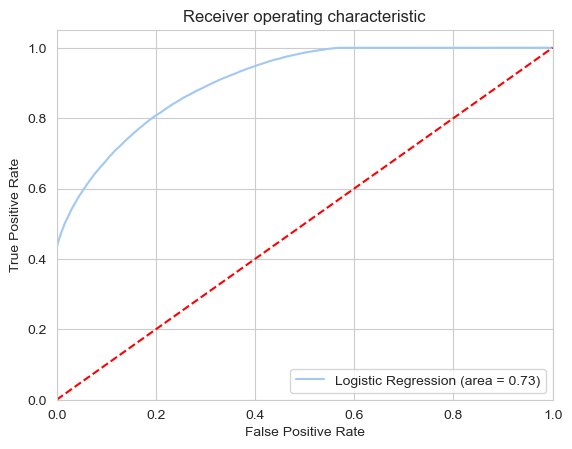

In [64]:
logit_roc_auc=roc_auc_score(y_test,model.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## 4.2 Precision Recall Curve

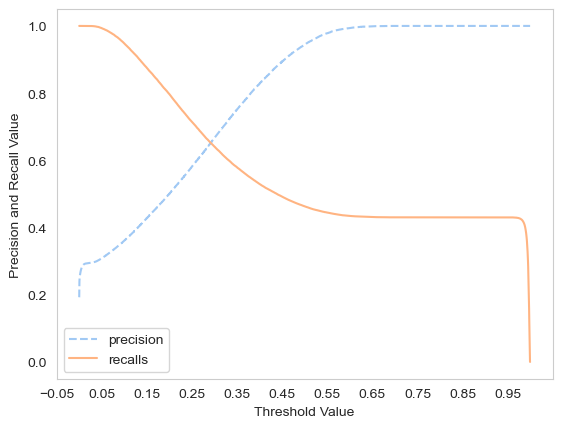

In [65]:
def precission_recall_curve_plot(y_test,pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    threshold_boundary = thresholds.shape[0]
    #plot precision
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    #plot recall
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recalls')
    
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

precission_recall_curve_plot(y_test,model.predict_proba(X_test)[:,1])

## 4.3 Classification Report (Confusion matrix etc)

**Confusion Matrix**

In [66]:
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[203611   1321]
 [ 26233  22608]]


In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94    204932
           1       0.94      0.46      0.62     48841

    accuracy                           0.89    253773
   macro avg       0.92      0.73      0.78    253773
weighted avg       0.90      0.89      0.88    253773



**Observations**

## 4.4 Tradeoff Questions:

### *4.4.1 How can we make sure that our model can detect real defaulters and there are less false postitives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.*


- We should focus on giving loans to profiles with good salary and strong credit score.
- Data we have is highly imbalanced dataset. A Good balanced data to be used for good model prediction.
- We can also try different classification like DT, KNN which perform better with imbalanced data.

### *4.4.2 Since NPA ( non performing asset) is a real problem in industry, it's important we play safe and shouldn't disburse loans to anyone.*

- To give loans to profiles with strong credit score with stable job and at good designation .
- To reduce NPA we can reduce the interest rate which will encourage borrower's to pay back loans.

# ***5. Actionable Insights and recommendations***

**Questionnaire**

Q1: What percentage of customers have fully paid their Loan Amount?<br>
Ans: 80.77%<br>
<br>
Q2: Comment about the correlation between Loan Amount and Installment features.<br>
Ans: correlation between Loan Amount and Installment features is 0.95 which is very high correlation.<br>
<br>
Q3: The majority of people have home ownership as _______.<br>
Ans: mortgage<br>
<br>
Q4: People with grades ‘A’ are more likely to fully pay their loan. (T/F)<br>
Ans: False <br>
<br>
Q5: Name the top 2 afforded job titles.<br>
Ans: Teacher and manager<br>
<br>
Q6: Thinking from a bank's perspective, which metric should our primary focus be on..<br>
        - ROC AUC<br>
        - Precision<br>
        - Recall<br>
        - F1 Score<br>
Ans: Since defaulters are very less and interest rate is high, the model should be such that it correctly classify 
     the "Fully paid" customers as much correctly possible.<br>
     Hence Recall should be high.<br>
<br>
Q7: How does the gap in precision and recall affect the bank?<br>
Ans: when Recall is high then chances of rejecting  good customer is very less.<br>
     when Precision is high then chances of giving loan to bad customers is very less.<br>
<br>
Q8: Which were the features that heavily affected the outcome?<br>
Ans: pub_rec_bankruptcies<br>
<br>
Q9: Will the results be affected by geographical location? (Yes/No)<br>
Ans: yes<br>

**Insights**
- Lower interest rates have less NPA/ loan defaulters.
- Installments are highly correlated to loan amounts.
- Borrower's who live on rent are likely to loan default.
- 'sub_grade' has high impact on predicting target var loan status.
- To reduce NPA we can reduce the interest rate which will encourage borrower's to pay back loans.
- home_ownership with 'MORTGAGE' high impact on predicting target var loan status.
- home_ownership with 'RENT' negative impact on predicting target var loan status.

**Recommendations**
1. Customers with Grade A are the most reliable on the repayments. Bank can extend the credit line to these customers and should focus and adding more new customers to list of borrowers. 93% of these have a track record of repaying their loan.

2. The term period of 60 months is a trouble when it comes to Charged Off accounts. 32% of accounts from 60 months term period turned into NPA based on the data available. So, here needs to rethink on the repayment terms.

3. The median annual income of Charged Off customers is 59K which is 6K less than median annual income of Fully Paid customers (65K). Please revisit the annual income thresholds while extending the credit lines to the customers.

4. The median dti ratio of Charged Off customers is 19.34 which is 3 points higher than the fully paid customers. Please give it a thought. This feature tops in first 5 most impactful features.

5. 37% of the grade E and 28% of the grade D customers are defaulters from historical data. The needs to put more stringent criteria and the grade E and D customers.

6. Median interest rates of defaulter customers are 2.62% higher than those of regular. Median interest rate of regular customers is 12.99% and for defaulters it's found that median interest rate is 15.61%. If the customer interest rates crawl above the alarming thresholds then that account is more probably more prone to become an NPA

7. Apart from this, the bank needs to focus more on improving the precision of correctly identifying the Charged Off customer. Becuase the current historical data trend shows that the bank is not so accurate in classifying the Charged Off customers. However these customers often get the green pass as a result of high FPR (False Positive Rate).